In [18]:
using Plots, FileIO 
using OrdinaryDiffEq

In [23]:
U = 10
L=4. # Length of the integration region
M=600 # number of space-points in the discretization
tf=4. # final time
dx = L/M
dt = 0.1 * dx
x = [(i-1)*dx for i in 1:M]
size(x)

(600,)

In [26]:
sol = load("Resultados/Soluciones/big_right_short_fast.jld2","big_right_short_fast");
sol_E = load("Resultados/Soluciones/big_pulse_to_the_right_E_fast.jld2","big_pulse_to_the_right_E_fast");

┌ Warning: some parameters could not be resolved for type ODEFunction{true,Main.#evolution_fast,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing}; reconstructing
└ @ JLD2 /Users/reula/.julia/packages/JLD2/F7wiE/src/data/reconstructing_datatypes.jl:440
┌ Warning: some parameters could not be resolved for type ODEFunction{true,Main.#evolution_fast,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing}; reconstructing
└ @ JLD2 /Users/reula/.julia/packages/JLD2/F7wiE/src/data/reconstructing_datatypes.jl:440


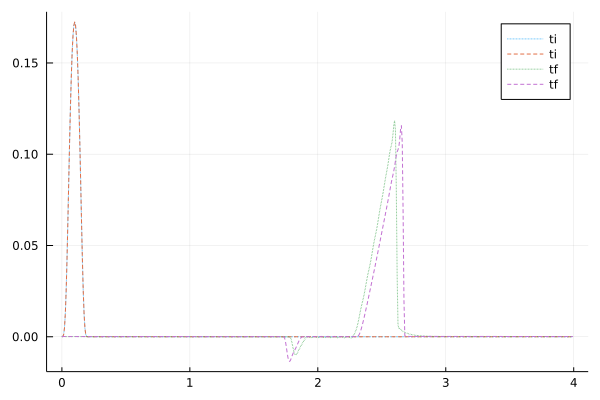

In [38]:
field = 7
plot(x,reshape(sol(0),(M,U))[:,field], label="ti", ls=:dot)
plot!(x,reshape(sol_E(0),(M,U))[:,field], label="ti", ls=:dash)
plot!(x,reshape(sol(tf),(M,U))[:,field], label="tf", ls=:dot)
plot!(x,reshape(sol_E(tf),(M,U))[:,field], label="tf", ls=:dash)

┌ Info: Saved animation to 
│   fn = /Users/reula/Julia/Fluidos_Conformes/Resultados/Movies/tmp.gif
└ @ Plots /Users/reula/.julia/packages/Plots/XuV6v/src/animation.jl:104


Plots.AnimatedGif("/Users/reula/Julia/Fluidos_Conformes/Resultados/Movies/tmp.gif")
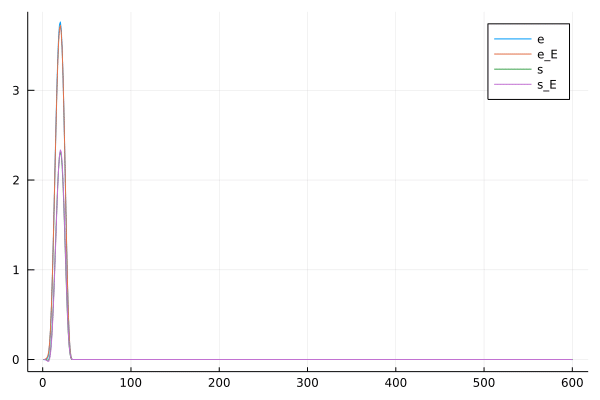

In [39]:
t=tf
shift = 0# U÷2 # 0 is conserv otherwise is fluid
anim = @animate for i ∈ 1:100
    t = tf*(0.01*i)
    plot((reshape(sol(t),(M,U))[:,shift+1] .- 6.0),label="e"
        #, yaxis = ("conserv", (-1.5,1.5))
    )
    plot!((reshape(sol_E(t),(M,U))[:,shift+1] .- 6.0),label="e_E")
    plot!((reshape(sol(t),(M,U))[:,shift+2] .- 0.),label="s")
    plot!((reshape(sol_E(t),(M,U))[:,shift+2] .- 0.),label="s_E")
end

gif(anim, "Resultados/Movies/tmp.gif", fps = 10)